# 거리 계산하기
# 가장 근처에 있는 요소 뽑기
# 예측하기

In [36]:
from math import sqrt
from IPython.display import Image

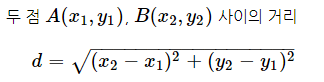

In [37]:
Image("img/euclidean_distance.png")

In [38]:
#거리 계산하기
# row = [x, y, type]
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)


In [39]:
# # 가장 근처에 있는 요소 뽑기
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [40]:
# Test distance function
# [x, y, type]
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

row0 = [3,3]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)
    
print ("================================")

neighbors = get_neighbors(dataset, row0, 3)
for neighbor in neighbors:
	print(neighbor)

0.2189163999999999
1.534510628
0.3965616879999998
1.61192981
0.06407232000000018
4.627531214
2.3324412480000003
3.922596716
5.675418650999999
4.673756466
[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]


In [41]:
# 예측하기 - 마지막에 예측된 type을 출력해주는 함수 입니다.
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	for neighbor in neighbors:
		print(neighbor)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [42]:
row0 = [3,3,0]

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]
Expected 0, Got 0.


In [44]:
row0 = [6,5,0]
prediction = predict_classification(dataset, row0, 5)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[7.673756466, 3.508563011, 1]
[3.396561688, 4.400293529, 0]
[7.627531214, 2.759262235, 1]
[5.332441248, 2.088626775, 1]
[6.922596716, 1.77106367, 1]
Expected 0, Got 1.
